# Module 5
Bankruptcy Prediction:
1 EDA
2 Model building
2-1 Decision Tree
2-2 Regression and tuning
2-3 Gradient Boosting and tuning
2-4 Extra tree

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

### Ingest

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.info() #no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### EDA--
Looking into bankruptcy counts in this dataset.

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

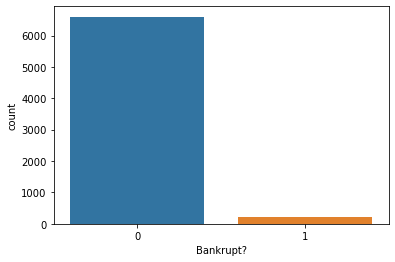

In [4]:
sns.countplot(x = 'Bankrupt?',data = data ) #visualize bankruptcy in dataset.
#Small portion of sample is bankrupted.

In [5]:
data['Bankrupt?'].value_counts()#highly imbalanced set

0    6599
1     220
Name: Bankrupt?, dtype: int64

Standarderization

In [6]:
x = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

In [7]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
scaler
xs = scaler.transform(x)

StandardScaler()

In [8]:
#min_max_scaler = preprocessing.MinMaxScaler()
#xms = min_max_scaler.fit_transform(x)

## Modeling

In [9]:
x_train, x_test, y_train, y_test = train_test_split(xs, y, train_size = 0.8, random_state=42)

In [34]:
## Use x and y to perform cross validation
x_ttrain, x_ttest, y_ttrain, y_ttest = train_test_split(x, y, train_size = 0.8,
                                                       random_state = 42)

### Desicion Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier().fit(x_ttrain, y_ttrain)
#tr_train_pred = tree_clf.predict(x_ttrain)
dr_pred = tree_clf.predict(x_ttest)

confusion_matrix(y_ttest, dr_pred)
tn, fp, fn, tp = confusion_matrix(y_ttest,dr_pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_ttest,dr_pred))

array([[1275,   38],
       [  35,   16]])

1275 38 35 16
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1313
           1       0.30      0.31      0.30        51

    accuracy                           0.95      1364
   macro avg       0.63      0.64      0.64      1364
weighted avg       0.95      0.95      0.95      1364



#### analysis and maually tune

In [135]:
tree_clf.tree_.max_depth
tree_clf.tree_.node_count
tree_clf.tree_.n_leaves

#tree_clf.decision_path(x_test,check_input=True)

#tree_clf.cost_complexity_pruning_path(x_train, y_train)

15

233

117

### Random Forest Classifier

In [193]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier().fit(x_ttrain, y_ttrain)
y_pred_rf = rnd_clf.predict(x_ttest)


In [194]:
confusion_matrix(y_ttest, y_pred_rf)
tn, fp, fn, tp = confusion_matrix(y_ttest,y_pred_rf).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_ttest,y_pred_rf))

array([[1311,    2],
       [  43,    8]])

1311 2 43 8
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.80      0.16      0.26        51

    accuracy                           0.97      1364
   macro avg       0.88      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364



With hypertuning, the best parameters have plug in the below cell.

In [269]:
rnd_clf2 = RandomForestClassifier(
                                n_estimators = 20,
                                criterion = 'gini',
                                max_features = 'auto',
                                max_depth = 20,
                                bootstrap = True,
                                min_samples_split = 10,
                                min_samples_leaf = 1,
                                #warm_start = True,
                                ).fit(x_ttrain, y_ttrain)
y_pred_rf2 = rnd_clf2.predict(x_ttest)
confusion_matrix(y_ttest, y_pred_rf2)
tn, fp, fn, tp = confusion_matrix(y_ttest,y_pred_rf2).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_ttest,y_pred_rf2))


array([[1310,    3],
       [  40,   11]])

1310 3 40 11
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.79      0.22      0.34        51

    accuracy                           0.97      1364
   macro avg       0.88      0.61      0.66      1364
weighted avg       0.96      0.97      0.96      1364



In [267]:
from sklearn.model_selection import GridSearchCV

param_grid = { 

    'n_estimators': [*range(10,50, 10)],
    

    'criterion' : ['gini'
                   #, 'entropy'
                  ],
    

    'max_features': ['auto', 'sqrt'],

    'max_depth' : [*range(10,100, 10)],

    'min_samples_split' : [2, 5, 10],

    'min_samples_leaf' : [1, 2, 4],
    

    'bootstrap' : [True
                   #, False
                  ]
}

gs = GridSearchCV(estimator=rnd_clf,
                 param_grid=param_grid,
                 cv=3,
                 scoring='f1',
                 n_jobs = -1,
                 return_train_score=True)
gs.fit(x_ttrain, y_ttrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30, 40]},
             return_train_score=True, scoring='f1')

In [272]:
gs.best_params_
gs.best_score_
gs.scorer_
f1_score

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 20}

0.2846158539326564

make_scorer(f1_score, average=binary)

<function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

### Gradient Boosting

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier().fit(x_ttrain, y_ttrain)
gb_ppred = gbrt.predict(x_ttest)
confusion_matrix(y_ttest, gb_ppred)
tn, fp, fn, tp = confusion_matrix(y_ttest,gb_ppred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_ttest,gb_ppred))

array([[1307,    6],
       [  38,   13]])

1307 6 38 13
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.68      0.25      0.37        51

    accuracy                           0.97      1364
   macro avg       0.83      0.63      0.68      1364
weighted avg       0.96      0.97      0.96      1364



In [283]:
gbrt2 = GradientBoostingClassifier(
                            n_estimators = 50,
                            criterion = 'mse',
                            learning_rate = 1,
                            max_features = 'auto',
                            max_depth = 100,
                            min_samples_split = 10,
                            min_samples_leaf = 4).fit(x_ttrain, y_ttrain)
gb_ppred2 = gbrt.predict(x_ttest)
confusion_matrix(y_ttest, gb_ppred2)
tn, fp, fn, tp = confusion_matrix(y_ttest,gb_ppred2).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_ttest,gb_ppred2))

array([[1307,    6],
       [  38,   13]])

1307 6 38 13
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.68      0.25      0.37        51

    accuracy                           0.97      1364
   macro avg       0.83      0.63      0.68      1364
weighted avg       0.96      0.97      0.96      1364



In [277]:
from sklearn.model_selection import GridSearchCV

#param_grid = { 
    #'n_estimators': [*range(10,50, 10)],
    

    #'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'
    #              ],
    #'learning_rate': [0.1, 0.5, 1],
    #'max_features': ['auto', 'sqrt'],

    #'max_depth' : [*range(10,100, 10)],

    #'min_samples_split' : [2, 5, 10],

    #'min_samples_leaf' : [1, 2, 4]
    
#}

#gs2 = GridSearchCV(estimator=gbrt,
                 #param_grid=param_grid,
                 #cv=3,
                 #scoring='f1',
                 #n_jobs = -1,
                 #return_train_score=True)
#gs2.fit(x_ttrain, y_ttrain)

In [ ]:
gs2_pred = gs2.predict(x_ttest)
confusion_matrix(y_ttest, gs2_pred)
tn, fp, fn, tp = confusion_matrix(y_ttest,gs2_pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_ttest,gs2_pred))

### Extra Tree

In [106]:
from sklearn.ensemble import ExtraTreesClassifier

ext = ExtraTreesClassifier().fit(x_ttrain, y_ttrain)
ext_pred = ext.predict(x_ttest)

confusion_matrix(y_ttest, ext_pred)
tn, fp, fn, tp = confusion_matrix(y_ttest,ext_pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_ttest,ext_pred))

array([[1310,    3],
       [  45,    6]])

1310 3 45 6
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.67      0.12      0.20        51

    accuracy                           0.96      1364
   macro avg       0.82      0.56      0.59      1364
weighted avg       0.96      0.96      0.95      1364



With above study, the gradient boosting model perform the best even without tuned parameter regarding f1 score. Further study can also including loss function, feature selecting. SMOTE() function maybe additional option for balanced data. One thing from all the tree base classifiers is that the f1 score has been increasing. The imbalanced dataset and strong related features do influence more on the dataset but only comparing the model. Ensemble tree base model perform better in binary classification problem.